In [1]:
import torch
import torch.nn as nn

def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMDEDDING_DIM = 100


# raw_text = """We are about to study the idea of a computational process.
# Computational processes are abstract beings that inhabit computers.
# As they evolve, processes manipulate other abstract things called data.
# The evolution of a process is directed by a pattern of rules
# called a program. People create programs to direct processes. In effect,
# we conjure the spirits of the computer with our spells.""".split()

with open("tokenized_documents.txt", "r") as file:
    read_raw_text = file.read()

raw_text = read_raw_text.split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}
print("done 0")

data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print("done 1")

class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()

        #out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        
        #out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim = -1)
        

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)


model = CBOW(vocab_size, EMDEDDING_DIM)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#TRAINING
for epoch in range(100):
    total_loss = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)  

        log_probs = model(context_vector)

        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

    #optimize at the end of each epoch
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    print(epoch, total_loss.item()) 

# #TESTING
# context = ['People','create','to', 'direct']
# context_vector = make_context_vector(context, word_to_ix)
# a = model(context_vector)

# #Print result
# print(f'Raw text: {" ".join(raw_text)}\n')
# print(f'Context: {context}\n')
# print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')
# Save the trained model
torch.save(model.state_dict(), "cbow_model_1.pth")
# Save the word_to_id dictionary to a JSON file
import json
with open('word_to_ix.json', 'w') as json_file:
    json.dump(word_to_ix, json_file)

# Save the word_to_id dictionary to a JSON file
import json
with open('ix_to_word.json', 'w') as json_file:
    json.dump(ix_to_word, json_file)

done 0
done 1
0 16184.546875
1 14421.4208984375
2 13823.7490234375
3 14266.1298828125
4 13269.9140625
5 12656.16796875
6 12295.876953125
7 11824.9208984375
8 12006.5888671875
9 11281.333984375
10 12096.46484375
11 11444.7548828125
12 10616.412109375
13 11556.9541015625
14 10481.4189453125
15 9641.6923828125
16 10646.501953125
17 11085.9658203125
18 12488.029296875
19 11894.099609375
20 10190.9990234375
21 9369.044921875
22 9589.8583984375
23 8417.998046875
24 8408.1845703125
25 9133.3017578125
26 8337.0244140625
27 7893.048828125
28 8779.9169921875
29 10653.3486328125
30 9550.84765625
31 7588.1630859375
32 6057.466796875
33 6177.49072265625
34 7486.5126953125
35 8554.8076171875
36 7508.8203125
37 6785.5595703125
38 6114.89013671875
39 5736.0380859375
40 4889.88134765625
41 5187.27734375
42 4963.85791015625
43 4568.00927734375
44 4587.427734375
45 5215.35400390625
46 3657.63916015625
47 4084.912841796875
48 3571.803955078125
49 3008.701171875
50 2598.0087890625
51 1742.4771728515625
52 

done 0
done 1
0 16202.5166015625
1 14410.0185546875
2 13803.31640625
3 14045.123046875
4 13138.5869140625
5 12581.9755859375
6 12180.76953125
7 12178.2177734375
8 12261.9287109375
9 11371.328125
10 11633.791015625
11 12573.6962890625
12 11150.2333984375
13 10776.6396484375
14 10833.5341796875
15 9726.2236328125
16 10650.9931640625
17 11314.6474609375
18 10028.0791015625
19 8794.515625
20 10015.2119140625
21 12294.12890625
22 11257.572265625
23 10490.1474609375
24 8945.3505859375
25 8082.8115234375
26 8093.53564453125
27 7065.42529296875
28 9564.3408203125
29 11377.3505859375
30 8909.1611328125
31 6664.98876953125
32 5837.8720703125
33 7642.29638671875
34 6833.6640625
35 6527.4658203125
36 6272.38427734375
37 6748.78564453125
38 5588.84326171875
39 7625.21044921875
40 6711.5869140625
41 4715.859375
42 3600.67529296875
43 5116.3857421875
44 5860.93603515625
45 6537.73779296875
46 5099.7607421875
47 2688.21484375
48 2646.34716796875
49 1934.2103271484375
50 2737.587158203125
51 4162.76757

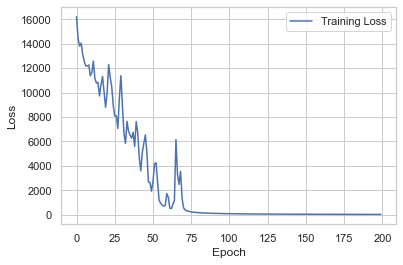

In [11]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMDEDDING_DIM = 100


# raw_text = """We are about to study the idea of a computational process.
# Computational processes are abstract beings that inhabit computers.
# As they evolve, processes manipulate other abstract things called data.
# The evolution of a process is directed by a pattern of rules
# called a program. People create programs to direct processes. In effect,
# we conjure the spirits of the computer with our spells.""".split()

with open("tokenized_documents_test.txt", "r") as file:
    read_raw_text = file.read()

raw_text = read_raw_text.split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}
print("done 0")

data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print("done 1")

class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()

        #out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        
        #out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim = -1)
        

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)


model = CBOW(vocab_size, EMDEDDING_DIM)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
losses = []
# TRAINING

# TRAINING
for epoch in range(200):
    total_loss = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)  

        log_probs = model(context_vector)

        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

    # Optimize at the end of each epoch
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    print(epoch, total_loss.item())

    # Append the loss to the list
    losses.append(total_loss.item())

# Plot the training loss
plt.figure()
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('image/training_loss_plot.png')
plt.savefig('image/training_loss_plot.png')

# #TESTING
# context = ['People','create','to', 'direct']
# context_vector = make_context_vector(context, word_to_ix)
# a = model(context_vector)

# #Print result
# print(f'Raw text: {" ".join(raw_text)}\n')
# print(f'Context: {context}\n')
# print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')
# Save the trained model
torch.save(model.state_dict(), "cbow_model_1.pth")
# Save the word_to_id dictionary to a JSON file
import json
with open('word_to_ix.json', 'w') as json_file:
    json.dump(word_to_ix, json_file)

# Save the word_to_id dictionary to a JSON file
import json
with open('ix_to_word.json', 'w') as json_file:
    json.dump(ix_to_word, json_file)

In [8]:
context = ['early','life','brain', 'injury'] 
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

#Print result
print(f'Raw text: {" ".join(raw_text)}\n')
print(f'Context: {context}\n')
print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')
plt.savefig('image/training_loss_plot.png', dpi=300)

Raw text: a self-supervised learning-based approach to clustering multivariate time-series data with missing values ( slac-time ) : an application to tbi phenotyping.self-supervised learning approaches provide a promising direction for clustering multivariate time-series data . however , real-world time-series data often include missing values , and the existing approaches require imputing missing values before clustering , which may cause extensive computations and noise and result in invalid interpretations . to address these challenges , we present a self-supervised learning-based approach to clustering multivariate time-series data with missing values ( slac-time ) . slac-time is a transformer-based clustering method that uses time-series forecasting as a proxy task for leveraging unlabeled data and learning more robust time-series representations . this method jointly learns the neural network parameters and the cluster assignments of the learned representations . it iteratively c

<Figure size 432x288 with 0 Axes>

In [9]:
import torch
import torch.nn.functional as F

# Assuming you have already defined context and context_vector
context = ['early', 'life', 'brain', 'injury']
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

# Apply softmax to the a tensor
softmax_scores = F.softmax(a[0], dim=0)

# Get the top 10 words and their softmax probabilities
top_k_values, top_k_indices = torch.topk(softmax_scores, k=10)

# Convert indices to words using ix_to_word
top_k_words = [ix_to_word[index.item()] for index in top_k_indices]

# Print the top 10 words and their associated softmax probabilities
for word, prob in zip(top_k_words, top_k_values):
    print(f'Word: {word}, Probability: {prob.item()}')

# Print the word with the highest probability
argmax_word = ix_to_word[top_k_indices[0].item()]
print(f'\nPrediction: {argmax_word}')
plt.savefig('image/training_loss_plot.png', dpi=300)


Word: traumatic, Probability: 0.9584670662879944
Word: ,, Probability: 0.004871344193816185
Word: in, Probability: 0.004796797409653664
Word: tumour, Probability: 0.0041791899129748344
Word: constrains, Probability: 0.0037165111862123013
Word: of, Probability: 0.0019020652398467064
Word: acquired, Probability: 0.0018442983273416758
Word: the, Probability: 0.0016364372568205
Word: or, Probability: 0.00137523771263659
Word: after, Probability: 0.001244480605237186

Prediction: traumatic


<Figure size 432x288 with 0 Axes>

/Users/benphan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benphan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benphan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/benphan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

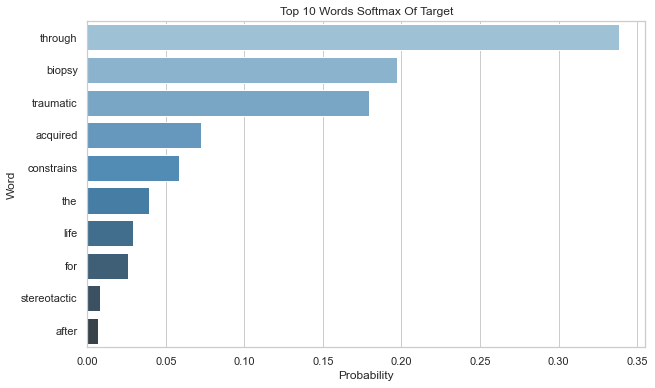

In [32]:
import torch
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined context and context_vector
context = ['early', 'life', 'brain', 'brain']


In [ ]:
import torch
import torch.nn as nn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the pre-trained CBOW model
model = CBOW(vocab_size, EMDEDDING_DIM)
model.load_state_dict(torch.load("cbow_model.pth"))  # Replace with the actual path to your saved model

# Extract word embeddings
word_embeddings = model.embeddings.weight.data.numpy()

# Reduce dimensionality to 2 using PCA
pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_embeddings)

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))

# Plot each word's embedding in 2D space
for i in range(len(ix_to_word)):
    x, y = word_embeddings_2d[i]
    word = ix_to_word[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y))

# Set labels for the axes
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()


In [ ]:
import torch
import torch.nn as nn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained CBOW model
model = CBOW(vocab_size, EMDEDDING_DIM)
model.load_state_dict(torch.load("cbow_model.pth"))  # Replace with the actual path to your saved model

# Extract word embeddings
word_embeddings = model.embeddings.weight.data.numpy()

# Reduce dimensionality to 2 using PCA
pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_embeddings)

# Create a 2D scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Convert word embeddings to a DataFrame
import pandas as pd
# word_df = pd.DataFrame({
#     'Word': list(ix_to_word.values()),
#     'Dimension 1': word_embeddings_2d[:, 0],
#     'Dimension 2': word_embeddings_2d[:, 1]
# })

num_words_to_plot = 50  # Change this to the desired number of words to plot

# Create a DataFrame for the selected words
word_df = pd.DataFrame({
    'Word': list(ix_to_word.values())[:num_words_to_plot],
    'Dimension 1': word_embeddings_2d[:num_words_to_plot, 0],
    'Dimension 2': word_embeddings_2d[:num_words_to_plot, 1]
})


# Create the scatter plot
scatter = sns.scatterplot(x='Dimension 1', y='Dimension 2', data=word_df, hue='Word', palette='viridis', legend=False)

# Annotate the points with word labels
for line in range(0, word_df.shape[0]):
    scatter.text(word_df['Dimension 1'][line], word_df['Dimension 2'][line], word_df['Word'][line],
                 horizontalalignment='left', size='small', color='black')

# Set labels for the axes
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()


In [9]:
import re
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

#text_data = "a self-supervised learning-based approach to clustering multivariate time-series data with missing values ( slac-time ) : an application to tbi phenotyping.self-supervised learning approaches provide a promising direction for clustering multivariate time-series data . however , real-world time-series data often include missing values , and the existing approaches require imputing missing values before clustering , which may cause extensive computations and noise and result in invalid interpretations."
with open("tokenized_documents.txt", "r") as file:
    text_data = file.read()

keyword = "covid".lower()

# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuation, numbers, and other non-word characters
    # text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convert to lowercase and split into words
    text_tokens = text.lower().split()
    # Remove duplicate words
    text_tokens = list(set(text_tokens))
    return text_tokens

# Preprocess the text data and keyword
text_tokens = preprocess_text(text_data)
keyword = keyword.lower()

# Train a Word2Vec model on the preprocessed text
sentences = [text_tokens]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # Adjust hyperparameters as needed.

# Calculate the word vector for the keyword
if keyword in model.wv:
    keyword_vector = model.wv[keyword]
else:
    print(f"The keyword '{keyword}' is not in the vocabulary of the model.")

# Calculate cosine similarity with all words in text_data
similarity_scores = []
for word in text_tokens:
    if word in model.wv:
        word_vector = model.wv[word]
        similarity = cosine_similarity([keyword_vector], [word_vector])
        similarity_scores.append((word, similarity))

# Sort the words by similarity score in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the ranking of the most similar words
k = 10  # You can change this to the desired number of top similar words
for i, (word, similarity) in enumerate(similarity_scores[:k], 1):
    print(f"{i}. {word}: {similarity[0][0]:.4f}")


1. covid: 1.0000
2. disassemble: 0.3928
3. asphyxial: 0.3669
4. tmev: 0.3666
5. ifs: 0.3624
6. rosresponsive: 0.3589
7. epilepticus: 0.3520
8. neocortical: 0.3505
9. toxicologists: 0.3440
10. smvs: 0.3428


In [ ]:
model.save("word2vec_model.bin")

In [ ]:
from gensim.models import Word2Vec
import re
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Load the Word2Vec model from the saved file
with open("tokenized_documents.txt", "r") as file:
    text_data = file.read()

keyword = "covid".lower()

# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuation, numbers, and other non-word characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase and split into words
    text_tokens = text.lower().split()
    # Remove duplicate words
    text_tokens = list(set(text_tokens))
    return text_tokens

# Preprocess the text data and keyword
text_tokens = preprocess_text(text_data)

model = Word2Vec.load("word2vec_model.bin")
keyword = "covid".lower()
if keyword in model.wv:
    keyword_vector = model.wv[keyword]
else:
    print(f"The keyword '{keyword}' is not in the vocabulary of the model.")

# Calculate cosine similarity with all words in text_data
similarity_scores = []
for word in text_tokens:
    if word in model.wv:
        word_vector = model.wv[word]
        similarity = cosine_similarity([keyword_vector], [word_vector])
        similarity_scores.append((word, similarity))

# Sort the words by similarity score in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the ranking of the most similar words
k = 10  # You can change this to the desired number of top similar words
for i, (word, similarity) in enumerate(similarity_scores[:k], 1):
    print(f"{i}. {word}: {similarity[0][0]:.4f}") 

In [ ]:
# Calculate the word vector for the keyword
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import Word2Vec
import re
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Load the Word2Vec model from the saved file
with open("tokenized_documents.txt", "r") as file:
    text_data = file.read()

keyword = "covid".lower()

# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuation, numbers, and other non-word characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase and split into words
    text_tokens = text.lower().split()
    # Remove duplicate words
    text_tokens = list(set(text_tokens))
    return text_tokens

# Preprocess the text data and keyword
text_tokens = preprocess_text(text_data)

model = Word2Vec.load("word2vec_model.bin")
keyword = "covid".lower() 

if keyword in model.wv:
    keyword_vector = model.wv[keyword]
else:
    print(f"The keyword '{keyword}' is not in the vocabulary of the model.")

# Calculate cosine similarity with all words in text_data
similarity_scores = []
for word in text_tokens:
    if word in model.wv:
        word_vector = model.wv[word]
        similarity = cosine_similarity([keyword_vector], [word_vector])
        similarity_scores.append((word, similarity))

# Sort the words by similarity score in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Extract the top 10 similar words and their similarity scores
top_words = [word for word, similarity in similarity_scores[:10]]
top_similarities = [similarity[0][0] for word, similarity in similarity_scores[:10]]

# Create a Seaborn plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_similarities, y=top_words, palette='viridis')
plt.xlabel('Cosine Similarity')
plt.ylabel('Words')
plt.title(f'Top 10 Word Similarities to "{keyword}"')
# Add annotations above each bar
for i, similarity in enumerate(top_similarities):
    plt.text(similarity, i, f"{similarity:.2f}", ha='left', va='center')
plt.show()

In [11]:
model_a = "


SyntaxError: EOL while scanning string literal (29552907.py, line 1)

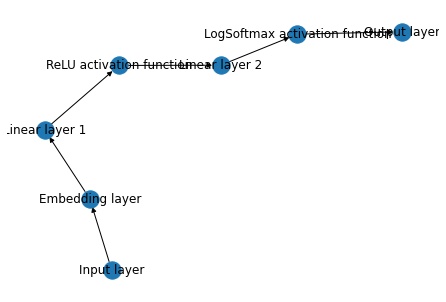

In [12]:
import networkx as nx

G = nx.DiGraph()

# Add nodes to the graph
G.add_node("Input layer")
G.add_node("Embedding layer")
G.add_node("Linear layer 1")
G.add_node("ReLU activation function")
G.add_node("Linear layer 2")
G.add_node("LogSoftmax activation function")
G.add_node("Output layer")

# Add edges to the graph
G.add_edge("Input layer", "Embedding layer")
G.add_edge("Embedding layer", "Linear layer 1")
G.add_edge("Linear layer 1", "ReLU activation function")
G.add_edge("ReLU activation function", "Linear layer 2")
G.add_edge("Linear layer 2", "LogSoftmax activation function")
G.add_edge("LogSoftmax activation function", "Output layer")

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


In [19]:
import torch
from torchviz import make_dot

class CBOW(torch.nn.Module):
    def __init__(self):
        super(CBOW, self).__init__()

        # Embedding layer
        self.embeddings = torch.nn.Embedding(20313, 100)

        # Linear layer 1
        self.linear1 = torch.nn.Linear(100, 128)

        # Activation function 1
        self.activation_function1 = torch.nn.ReLU()

        # Linear layer 2
        self.linear2 = torch.nn.Linear(128, 20313)

        # Activation function 2
        self.activation_function2 = torch.nn.LogSoftmax(dim=-1)

    def forward(self, x):
        # Embed the input words
        x = self.embeddings(x)

        # Apply the first linear layer and activation function
        x = self.activation_function1(self.linear1(x))

        # Apply the second linear layer and activation function
        x = self.activation_function2(self.linear2(x))

        return x

# Create a CBOW model
model = CBOW()

# Make a dot plot of the model architecture
dot = make_dot(model(torch.tensor([1, 2, 3])))

# Save the dot plot as a PNG image
dot.render("CBOW_model.png")


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [14]:
! pip install torchviz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 47 kB 1.6 MB/s eta 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=80f89313daf93b3a6fbad451d72abfefbc7f609f2f4aefa32296d9813333ec7e
  Stored in directory: /private/var/folders/jc/9krvg9jj60x85qvg498y04sh0000gn/T/pip-ephem-wheel-cache-0y394ktl/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


In [22]:
class CBOW(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, hidden_dim):
        super(CBOW, self).__init__()

        self.embeddings = nn.Embedding(num_embeddings, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, hidden_dim)
        self.activation_function1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, num_embeddings)
        self.activation_function2 = nn.LogSoftmax(dim=-1)

    def forward(self, inputs):
        embedded_inputs = self.embeddings(inputs)
        hidden_layer = self.linear1(embedded_inputs)
        activated_hidden_layer = self.activation_function1(hidden_layer)
        output = self.linear2(activated_hidden_layer)
        return self.activation_function2(output)

NameError: name 'nn' is not defined

In [21]:
# Plot the embedding layer
ax.plot([0, 1], [100, 100], 'k-')
ax.text(0.5, 100, 'Embedding layer', ha='center', va='center')

# Plot the linear layer 1
ax.plot([1, 2], [100, 128], 'k-')
ax.text(1.5, 114, 'Linear layer 1', ha='center', va='center')

# Plot the activation function 1
ax.plot([2, 3], [128, 128], 'k-')
ax.text(2.5, 128, 'ReLU', ha='center', va='center')

# Plot the linear layer 2
ax.plot([3, 4], [128, 100], 'k-')
ax.text(3.5, 114, 'Linear layer 2', ha='center', va='center')

# Plot the activation function 2
ax.plot([4, 5], [100, 100], 'k-')
ax.text(4.5, 100, 'LogSoftmax', ha='center', va='center')

# Add labels and title
ax.set_xlabel('Model layer')
ax.set_ylabel('Output dimension')
ax.set_title('CBOW model architecture')

NameError: name 'ax' is not defined